**LearnPy: Python for Data Analytics**

- Author : Team Algoritma
- Developed by Algoritma's product division and instructors team
___

# Reshaping, Group By Aggregation, and Pandas Visualization

Pada bagian ini Anda akan diperkenalkan dengan struktur dataframe MultiIndex dan bagaimana cara untuk melakukan reshaping sebuah dataframe. Selain itu, Anda akan diperkenalkan dengan salah satu metode untuk melakukan agregasi yaitu `groupby()`. Method groupby ini memiliki beberapa kesamaan dengan method `crosstab()` dan `pivot_table()`, akan tetapi groupby memiliki kelebihan dimana dataframe hasil agregasinya akan lebih rapi(tidy) dibandingkan crosstab() maupun pivot_table(). Di akhir sesi, Anda akan diperkenalkan dengan method visualisasi dasar dari package Pandas yaitu `plot()`.

## Reshaping 
Reshaping merupakan sebuah teknik untuk mengubah bentuk data yang kita punya. Jika Anda pernah mengenal istilah dataframe dengan bentuk wide format dan long format, disinilah letak reshaping akan dibutuhkan. Lalu apa perbedaan di antara kedua bentuk data tersebut? Apakah ada kebutuhan khusus kapan kita bekerja dengan data yang memiliki bentuk wide maupun long format? Perhatikan contoh di bawah ini.

In [2]:
import pandas as pd

In [3]:
traffic = pd.read_pickle("data_input/traffic.pkl")
traffic

Bounce Rate                           Sessions               \
Device Category     desktop     mobile     tablet      desktop       mobile   
Date                                                                          
2019-06-01        41.455099  64.462710  20.012573   337.921687   582.246269   
2019-06-02        32.372644  46.659636  44.833929   320.876543   916.636364   
2019-06-03        28.904192  43.962397  85.697323   821.010471   891.817610   
2019-06-04        38.309282  57.369383  22.644138  1006.187097   837.184211   
2019-06-05        52.500556  59.074780  22.220044   871.426136   647.034091   
2019-06-06        49.334430  46.404598  18.004510   794.953216   572.264706   
2019-06-07        39.676456  18.300918  11.164204   911.410072   573.933824   
2019-06-08        17.311701  60.238653  71.426596   253.587786   434.396226   
2019-06-09        55.998428  40.222750  67.926808   248.651316   678.524272   
2019-06-10        26.180226  57.754588  50.000000   985.912162   682.203252   
2019-06-11        37.753643  62.345669  50.079057  1136.516949   729.638655   
2019-06-12        25.818185  54.122648  58.855527   791.540741  1148.252747   
2019-06-13        52.585225  25.889443   0.000000   771.790698   551.606667   
2019-06-14        56.637544  46.837113   0.000000   656.685315   536.122951   
2019-06-15        46.672843  44.518395  34.160500   330.114583   478.752577   
2019-06-16        57.027557  44.338328  75.162350   254.318182   443.754545   
2019-06-17        35.958897  59.745896  61.669496   833.196262   894.611111   
2019-06-18        49.535876  46.825643  24.993294   920.336735   886.759036   
2019-06-19        41.476804  58.212215  16.662196   907.239583   614.321429   
2019-06-20        28.784344  48.037109  46.805616   921.512821   764.410256   
2019-06-21        21.601922  44.209869   0.000000   644.919540   653.825581   
2019-06-22        37.373491  57.128801  52.502380   240.538462   608.328358   
2019-06-23        11.922650  56.052432  54.108424   404.360000   593.741935   
2019-06-24        41.200403  60.649373  42.885833   881.188406   879.983051   
2019-06-25        38.858997  49.920611  44.501913   921.369231   856.113208   
2019-06-26        32.394944  48.672402  44.497656  1078.000000   835.851064   
2019-06-27        50.778923  55.180274  47.058824   953.480769   790.500000   
2019-06-28        42.412381  53.702514  55.248658   728.851064   902.729730   
2019-06-29        35.244142  48.952851  25.000000   210.684211   549.027027   
2019-06-30        40.833044  46.124542  39.668914   228.375000   584.307692   

                            Total Visitors                          
Device Category      tablet        desktop      mobile      tablet  
Date                                                                
2019-06-01       115.878788     314.909639  477.708955  115.878788  
2019-06-02       132.492308     305.611111  741.898990  131.892308  
2019-06-03       270.419355     744.178010  695.792453  115.870968  
2019-06-04       154.600000     908.735484  684.184211   64.477778  
2019-06-05       141.804598     788.664773  519.465909  128.896552  
2019-06-06       100.564286     699.555556  462.694118   85.135714  
2019-06-07       103.160494     790.964029  481.845588  103.160494  
2019-06-08       270.692308     215.206107  377.484277  232.000000  
2019-06-09       113.076923     235.914474  565.883495   75.846154  
2019-06-10        38.958333     891.054054  546.373984   38.958333  
2019-06-11        77.582609    1037.466102  594.075630   62.113043  
2019-06-12        60.125000     734.807407  904.153846   60.125000  
2019-06-13       116.119048     670.968992  410.433333  116.119048  
2019-06-14        58.225000     553.503497  421.885246   58.225000  
2019-06-15        65.107143     299.458333  418.010309   65.107143  
2019-06-16        58.250000     229.027273  412.072727   58.250000  
2019-06-17        67.521739     709.420561  695.755556   67.521739  
2019-06-18       155.062500 

Data di atas merupakan data traffic sebuah website. Data tersebut dikumpulkan berdasarkan jenis device yaitu traffic pada desktop, mobile device, dan tablet. Analisis traffic website umum dilakukan dengan tujuan untuk mengevaluasi apakah website yang dibangun sudah sesuai dengan kebutuhan user/pengguna website. Selain itu, analisis traffic website diperlukan untuk melihat kekurangan dari website yang harus segera di perbaiki, mengukur efisiensi, dana melihat perubahan strategis yang dilakukan perusahaan. Dalam melakukan analisis terhadap traffic sebuah website, kita akan melihat beberapa parameter yang paling umum digunakan yaitu bounce rate, session, dan total visitor. Bounce rate adalah persentase pengunjung yang langsung meninggalkan website setelah membuka satu halaman saja [Google Analytics](https://support.google.com/analytics/answer/1009409?hl=id). Pendapat lain mengatakan bahwa bounce rate adalah keadaan dimana setelah pengunjung membuka sebuah halaman website, ia tidak melakukan tindakan apapun di halaman tersebut. Semakin tinggi nilai bounce rate menandakan ada yang salah dengan strategi website yang dijalankan. 

Session adalah kumpulan interaksi pengguna dengan situs Anda dalam jangka waktu tertentu. 

In [4]:
traffic.shape

(30, 9)

### Stack 

Metode pertma yang dapat dilakukan untuk melakukan reshaping adalah stack. Metode ini mencoba untuk menggeser level sebuah kolom untuk membuat level baru pada indeksnya. Pada pandas Anda dapat menggunakan method stack(). Perhatikan contoh berikut:

In [10]:
traffic_stack = traffic.stack()
traffic_stack.head(9)

Bounce Rate    Sessions  Total Visitors
Date       Device Category                                         
2019-06-01 desktop            41.455099  337.921687      314.909639
           mobile             64.462710  582.246269      477.708955
           tablet             20.012573  115.878788      115.878788
2019-06-02 desktop            32.372644  320.876543      305.611111
           mobile             46.659636  916.636364      741.898990
           tablet             44.833929  132.492308      131.892308
2019-06-03 desktop            28.904192  821.010471      744.178010
           mobile             43.962397  891.817610      695.792453
           tablet             85.697323  270.419355      115.870968

Stack dapat mengubah bentuk sebuah datframe dari format wide ke format long. Secara default method stack() akan menggeser kolom yang levelnya adalah -1. Itu artinya kolom yang memiliki level paling dalam yang akan tergeser membentuk level baru pada indeksnya. Analisis dengan bentuk dataframe seperti ini (long format) sangat membantu jika kita ingin membandingkan parameter evaluasi website dari ketiga device per masing-masing tanggal. Bagaimana jika kita ingin mengembalikannya ke bentuk dataframe awal? 

### Unstack
Pada bagian sebelumnya, kita telah mencoba untuk mengubah bentuk dataframe dari format wide ke format long. Pada kasus tertentu, dataframe juga dapat diubah dari bentuk dengan format long ke format wide. Pandas menyediakan sebuah method yaitu unstack(). Perhatikan contoh berikut:

In [11]:
traffic_unstack = traffic_stack.unstack()
traffic_unstack.head(9)

Bounce Rate                           Sessions              \
Device Category     desktop     mobile     tablet      desktop      mobile   
Date                                                                         
2019-06-01        41.455099  64.462710  20.012573   337.921687  582.246269   
2019-06-02        32.372644  46.659636  44.833929   320.876543  916.636364   
2019-06-03        28.904192  43.962397  85.697323   821.010471  891.817610   
2019-06-04        38.309282  57.369383  22.644138  1006.187097  837.184211   
2019-06-05        52.500556  59.074780  22.220044   871.426136  647.034091   
2019-06-06        49.334430  46.404598  18.004510   794.953216  572.264706   
2019-06-07        39.676456  18.300918  11.164204   911.410072  573.933824   
2019-06-08        17.311701  60.238653  71.426596   253.587786  434.396226   
2019-06-09        55.998428  40.222750  67.926808   248.651316  678.524272   

                            Total Visitors                          
Device Category      tablet        desktop      mobile      tablet  
Date                                                                
2019-06-01       115.878788     314.909639  477.708955  115.878788  
2019-06-02       132.492308     305.611111  741.898990  131.892308  
2019-06-03       270.419355     744.178010  695.792453  115.870968  
2019-06-04       154.600000     908.735484  684.184211   64.477778  
2019-06-05       141.804598     788.664773  519.465909  128.896552  
2019-06-06       100.564286     699.555556  462.694118   85.135714  
2019-06-07       103.160494     790.964029  481.845588  103.160494  
2019-06-08       270.692308     215.206107  377.484277  232.000000  
2019-06-09       113.076923     235.914474  565.883495   75.846154

Dari contoh di atas, ketika kita melakukan unstack maka index dengan level paling dalam (-1) akan tergeser dan membuat level baru pada kolom. Jika diperhatikan, bentuk dataframe yang seperti ini akan membantu kita untuk membaca hasil analisis perbedaan per tanggal pada masing-masing parameter evaluasi website untuk setiap device. Bagaimana? Cukup mudah bukan untuk melakukan reshaping data menggunakan pandas? Untuk menguji pemahaman Anda terkait stack() dan unstack() silahkan kerjakan latihan di bawah ini.

#### Knowledge Check

1. Dengan menggunakan objek `traffic`, bagaimana cara yang dapat dilakukan untuk melakukan reshaping dimana level yang akan digeser adalah parameter evaluasi website(Bounce Rate, Sessions, dan Total Visitor)? Apa method yang kita gunakan?

In [12]:
## Code here

##

2. Dengan menggunakan objek `traffic_stack`, bagaimana cara yang dapat dilakukan untuk melakukan reshaping dimana level yang akan digeser adalah index `Date`? Apa method yang kita gunakan?

In [13]:
## Code here

##

3. Anda adalah seorang evaluator website, Anda ingin melihat perbedaan kunjungan website setiap harinya. Bagaimana cara Anda untuk melakukan hal tersebut? Bentuk dataframe seperti apa yang cocok kita gunakan? (Hint: Gunakan method `diff()` untuk menghitung perbedaan total visitor) 

In [ ]:
## Code here

##

### MultiIndex Slicer
Adakalanya kita harus melakukan analisis yang lebih spesifik. Kita telah memiliki dataframe dengan nama `traffic` yang merupakan data traffic dan kunjungan pada sebuah website. Pandas dapat membantu kita mengekstrak sebagian data pada dataframe traffic. Katakanlah kita hanya akan mengambil semua parameter evaluasi website pada device desktop. Pandas memudahkan pekerjaan tersebut dengan method `xs()`. Perhatikan contoh berikut:

In [18]:
desktop_traf = traffic.xs(key='desktop',level='Device Category', axis=1)
desktop_traf.head()

,Bounce Rate,Sessions,Total Visitors
Date,,,
2019-06-01,41.455099,337.921687,314.909639
2019-06-02,32.372644,320.876543,305.611111
2019-06-03,28.904192,821.010471,744.178010
2019-06-04,38.309282,1006.187097,908.735484
2019-06-05,52.500556,871.426136,788.664773


Method `xs()` setidaknya membutuhkan 3 parameter yaitu key, level, dan axis dari data yang ingin kita ambil secara spesifik. Cara seperti ini akan memudahkan kita untuk menganalisis secara terpisah karena akan sangat sulit juga ketika nantinya kita melakukan agregasi dengan bentuk dataframe multiindex.

### Melt
Pada bagian sebelumnya, Anda telah berhasil memisahkan data evaluasi website pada device desktop. Bagaimana jika Anda ingin menjadikan satu setiap parameter evaluasi website ke dalam satu kolom? Pandas menyediakan sebuah method yaitu `melt()`. Perhatikan contoh di bawah ini!

In [19]:
desktop_melt = desktop_traf.melt()
desktop_melt.head()

,variable,value
0,Bounce Rate,41.455099
1,Bounce Rate,32.372644
2,Bounce Rate,28.904192
3,Bounce Rate,38.309282
4,Bounce Rate,52.500556


Secara default, `melt()` melakukan unpivot data dari bentuk dataframe dengan format wide ke format long dengan tidak menyertakan id variabel dari dataframe tersebut. Method ini memiliki kemiripan dengan method `stack()` yang telah Anda pelajari sebelumnya. Bagaimana jika Anda ingin tetap menampilkan Index `Date`? Lakukanlah reshaping dengan method `melt()` dan simpan ke dalam objek dengan nama `desktop_melt_new`.

In [ ]:
## Code Here

##

Untuk memahami lebih lanjut mengenai `melt()` silahkan cek dimensi objek desktop_traff dan desktop_melt. Apa yang Anda temukan?

#### Dive Deeper
Anda telah berhasil melakukan unpivot data pada bagian sebelumnya menggunakan method `melt()`. Bagaimana cara Anda untuk mengembalikannya ke bentuk semula (katakanlah Anda mendapat sebuah data dengan format long kemudian Anda harus mengubahnya ke format wide)? Hint : Gunakan objek `desktop_melt_new` yang telah Anda buat sebelumnya, ubah bentuk datanya dengan method ['pivot()'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) 

In [ ]:
## Code here

##

## Groupby Aggregation
Pada bagian Exploratory Data Analysis Anda telah belajar melakukan tabulasi silang antar kolom dengan menggunakan method `crosstab()` dan telah melakukan pivoting table menggunakan method `pivot_table()`. Kedua method tersebut digunakan untuk menampilkan ringkasan dari sebuah data. Anda juga telah berhasil mengkombinasikannya dengan fungsi agregasi. Pada bagian ini, Anda akan dikenalkan dengan satu lagi method melakukan ringkasan dan mengelompokkan data berdasarkan variabel tertentu. Pandas dapat memudahkan Anda dalam mengelompokkan data dengan menggunakan method `groupby()`. Perhatikan contoh berikut ini:

In [27]:
desktop_traf.head()

,Bounce Rate,Sessions,Total Visitors
Date,,,
2019-06-01,41.455099,337.921687,314.909639
2019-06-02,32.372644,320.876543,305.611111
2019-06-03,28.904192,821.010471,744.178010
2019-06-04,38.309282,1006.187097,908.735484
2019-06-05,52.500556,871.426136,788.664773


In [28]:
# extract nilai datetime dari index
desktop_traf.index = pd.to_datetime(desktop_traf.index)
desktop_traf['Weekday'] = desktop_traf.index.weekday_name
desktop_traf['Weeknumber'] = desktop_traf.index.week

# membuat variabel 'Visitors Growth'
desktop_traf['Visitors Growth'] = desktop_traf['Total Visitors'].diff()
desktop_traf = desktop_traf.round(2)
desktop_traf.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Bounce Rate,Sessions,Total Visitors,Weekday,Weeknumber,Visitors Growth
Date,,,,,,
2019-06-26,32.39,1078.00,894.44,Wednesday,26,165.39
2019-06-27,50.78,953.48,813.15,Thursday,26,-81.28
2019-06-28,42.41,728.85,604.89,Friday,26,-208.26
2019-06-29,35.24,210.68,192.32,Saturday,26,-412.58
2019-06-30,40.83,228.38,196.84,Sunday,26,4.53


In [35]:
desktop_traf.groupby('Weekday').mean().sort_values('Total Visitors', ascending=False)

,Bounce Rate,Sessions,Total Visitors,Weeknumber,Visitors Growth
Weekday,,,,,
Tuesday,41.1150,996.1050,871.9025,24.5,87.5050
Wednesday,38.0475,912.0525,798.9825,24.5,-72.9175
Monday,33.0600,880.3275,784.3950,24.5,502.5075
Thursday,45.3700,860.4325,761.2700,24.5,-37.7125
Friday,40.0825,735.4675,620.0450,24.5,-141.2225
Sunday,39.6300,291.3180,264.8780,24.0,17.0440
Saturday,35.6100,274.5680,247.8380,24.0,-388.9825


Contoh di atas adalah cara jika kita ingin mengelompokkan data untuk melihat rata-rata traffic sebuah website setiap harinya. Jika diperhatikan rata-rata kunjungan pengguna website paling tinggi adalah pada hari Selasa dan pertumbuhan kunjungan website menurun pada hari Sabtu. Kita juga dapat mengelompokkan data lebih dari 1 kolom. Berikut ini contoh jika kita ingin melihat rata-rata evaluasi traffic website berdasarkan hari di setiap minggunya. 

In [36]:
desktop_traf.groupby(by = ['Weekday','Weeknumber']).mean().head(10)

Bounce Rate  Sessions  Total Visitors  Visitors Growth
Weekday  Weeknumber                                                        
Friday   23                39.68    911.41          790.96            91.41
         24                56.64    656.69          553.50          -117.47
         25                21.60    644.92          530.83          -330.57
         26                42.41    728.85          604.89          -208.26
Monday   23                28.90    821.01          744.18           438.57
         24                26.18    985.91          891.05           655.14
         25                35.96    833.20          709.42           480.39
         26                41.20    881.19          792.93           435.93
Saturday 22                41.46    337.92          314.91              NaN
         23                17.31    253.59          215.21          -575.76

Bagaimana, cukup mudah bukan mengelompokkan data di pandas? Anda dapat mengkombinasikan juga method `groupby()` dengan method `agg()` untuk menggunakan fungsi agregasi yang berbeda pada setiap variabel numerik dari data Anda.

#### Knowledge Check
Perhatikan data traffic di bawah ini!

In [37]:
traffic.head()

Bounce Rate                           Sessions              \
Device Category     desktop     mobile     tablet      desktop      mobile   
Date                                                                         
2019-06-01        41.455099  64.462710  20.012573   337.921687  582.246269   
2019-06-02        32.372644  46.659636  44.833929   320.876543  916.636364   
2019-06-03        28.904192  43.962397  85.697323   821.010471  891.817610   
2019-06-04        38.309282  57.369383  22.644138  1006.187097  837.184211   
2019-06-05        52.500556  59.074780  22.220044   871.426136  647.034091   

                            Total Visitors                          
Device Category      tablet        desktop      mobile      tablet  
Date                                                                
2019-06-01       115.878788     314.909639  477.708955  115.878788  
2019-06-02       132.492308     305.611111  741.898990  131.892308  
2019-06-03       270.419355     744.178010  695.792453  115.870968  
2019-06-04       154.600000     908.735484  684.184211   64.477778  
2019-06-05       141.804598     788.664773  519.465909  128.896552

Dengan menggunakan strategi `groupby()`, bagaimana cara Anda untuk menghitung total evaluasi traffic website pada setiap device (desktop, mobile, tablet) untuk masing-masing parameter evaluasi (Bounce Rate, Sessions, Total Visitors)? 

Ekspektasi output:
<img src="assets/groupby_multi.PNG" width=400>

In [ ]:
## Code Here


##

## Pandas Data Visualization
Dalam melakukan analisis data, cara paling umum untuk menyampaikan ringkasan data adalah dengan menggunakan visualisasi. Pandas menyediakan fungsionalitas untuk membuat plot sederhana menggunakan method `.plot()`. Method ini merupakan method yang dapat di akses dari dataframe secara langsung. Perhatikan contoh di bawah ini untuk melihat bagaimana cara memvisualisasikan rata-rata pengunjung website untuk setiap harinya!

In [40]:
desktop_traf.head()

,Bounce Rate,Sessions,Total Visitors,Weekday,Weeknumber,Visitors Growth
Date,,,,,,
2019-06-01,41.46,337.92,314.91,Saturday,22,NaN
2019-06-02,32.37,320.88,305.61,Sunday,22,-9.30
2019-06-03,28.90,821.01,744.18,Monday,23,438.57
2019-06-04,38.31,1006.19,908.74,Tuesday,23,164.56
2019-06-05,52.50,871.43,788.66,Wednesday,23,-120.07


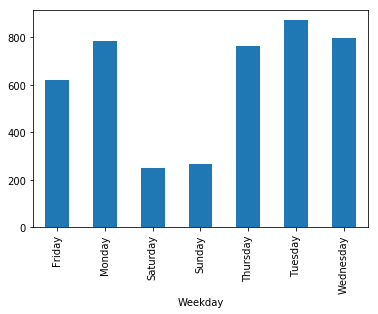

In [43]:
desktop_traf.groupby('Weekday').mean()['Total Visitors'].plot(kind='bar')

Dengan cara visualisasi seperti ini, pembaca akan dimudahkan untuk menganalisis bahwa kunjungan website paling banyak adalah pada hari Selasa dan paling sedikit pada hari weekend yaitu hari Sabtu dan Minggu. Jika Anda perhatikan, method `.plot()` memiliki parameter `kind` yang membantu Anda untuk memilih jenis plot yang akan digunakan untuk melakukan visualisasi. Jenis-jenis plot yang didukung oleh method ini berdasarkan informasi pada official pagenya adalah sebagai berikut :

__kind : str__
- `line` : line plot (default)
- `bar` : vertical bar plot
- `barh` : horizontal bar plot
- `hist` : histogram
- `box` : boxplot
- `kde` : Kernel Density Estimation plot
- `density` : sama seperti ‘kde’
- `area` : area plot
- `pie` : pie plot
- `scatter` : scatter plot
- `hexbin` : hexbin plot

### Knowledge Check
Pada data `desktop_traf` Anda memiliki variabel `Visitor Growth` yang menunjukkan pertumbuhan pengunjung website. Dengan menggunakan method `.plot()`, bagaimana cara Anda memvisualiasikan pertumbuhan pengunjung website per harinya? (Note: Urutkan visualisasi dari hari Monday-Sunday)

Ekspektasi output:
<img src="assets/weekday_growth.PNG" width=400>

In [46]:
## Code Here


##

## QUIZ

In [22]:
turnover = pd.read_csv('data_input/turnover_balance.csv')
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary,left
0,0.82,0.68,3,140,2,0,0,sales,low,0
1,0.79,0.67,5,156,2,0,0,product_mng,low,0
2,0.73,0.95,3,149,2,0,0,support,low,0
3,0.92,0.78,3,218,3,0,0,technical,low,0
4,0.69,1.00,5,237,3,0,0,technical,high,0


Berdasarkan data turnover diatas, berikut ini adalah deskripsi dari setiap variabelnya :

- `satisfaction_level` : tingkat kepuasan karyawan bekerja di suatu perusahaan
- `last_evaluation` : tingkat kepuasan karyawan pada evaluasi terakhir
- `number_project` : banyaknya project yang telah diterima karyawan
- `average_monthly_hours` : rata-rata jam kerja per bulan
- `time_spend_company` : lama waktu bekerja dalam perusahaan (tahun)
- `Work_accident` : ada tidaknya kecelakaan kerja, 0 = tidak ada, 1 = ada
- `promotion_last_5years` : pernah mendapatkan promoksi dalam 5 tahun terakhir, 0 = tidak, 1 = ya
- `division` : nama departemen atau divisi
- `salary` : tingkat pendapatan, dibagi menjadi low, medium dan high
- `left` : data history karyawan resign, 0 = tidak, 1 = ya

In [23]:
turnover.shape

(7142, 10)

In [39]:
turnover.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
division                  object
salary                    object
left                       int64
dtype: object

**Question**

Dari data turnover di atas, lakukan preprocessing data dengan:

1. Mengubah tipe data variabel yang belum tersimpan dengan benar

2. Ubah nilai pada variabel `Work_accident`, `promotion_last_5years`, dan `left` dengan keterangan jika 0 = tidak, 1 = ya

Selanjutnya bagaimana cara Anda untuk memvisualisasikan:
1. Proporsi history karyawan yang left/tidak left pada setiap divisi dalam 1 plot?
2. Berapa jumlah project yang telah diterima oleh karyawan pada masing-masing divisi?